
- Data Exploration -
🛍️ Competition Goal: For each customer within the training data we need to predict up to 12 products that the customer will buy in the next 7-day period after the training time period. We can predict up to 12 products that the customer will likely be purchasing in the 7-day period.

Notebook Color Scheme:


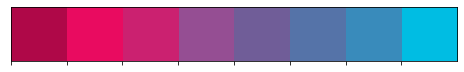

In [13]:
import os #interacting with the operating system
import gc #autoamtic garbage collector memory management
import wandb #A tool for visualizing and tracking your machine learning experiment
import time
import random
import glob #In Python, the glob module is used to retrieve files/pathnames matching a specified pattern
from scipy import spatial #used for find distance between points
from tqdm import tqdm # progress bar
import warnings
import cv2 #ciPy library for numerical processing.
import pandas as pd
import numpy as np
from numpy import dot, sqrt #  determine the positive square-root of an array, element-wise.
import seaborn as sns #data visualization
import matplotlib as mpl #data visualization
import matplotlib.patches as patches #Patches are arbitrary two dimensional regions
import matplotlib.pyplot as plt #data visualization
import matplotlib.image as mpimg # plotting images
from IPython.display import display_html
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
plt.rcParams.update({'font.size': 16})

# Environment check
warnings.filterwarnings("ignore")
os.environ["WANDB_SILENT"] = "true"
CONFIG = {'competition': 'HandM', '_wandb_kernel': 'aot'}

# Custom colors
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'
    
my_colors = ["#AF0848", "#E90B60", "#CB2170", "#954E93", "#705D98", "#5573A8", "#398BBB", "#00BDE3"]
print(clr.S+"Notebook Color Scheme:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

In [73]:
articles =pd.read_csv("articles.csv")
customers =pd.read_csv("customers.csv")
sample_submission=pd.read_csv("sample_submission.csv")
transcation  =pd.read_csv("transactions_train.csv")


In [20]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [21]:
articles.shape

(105542, 25)

#HISTOGRAM

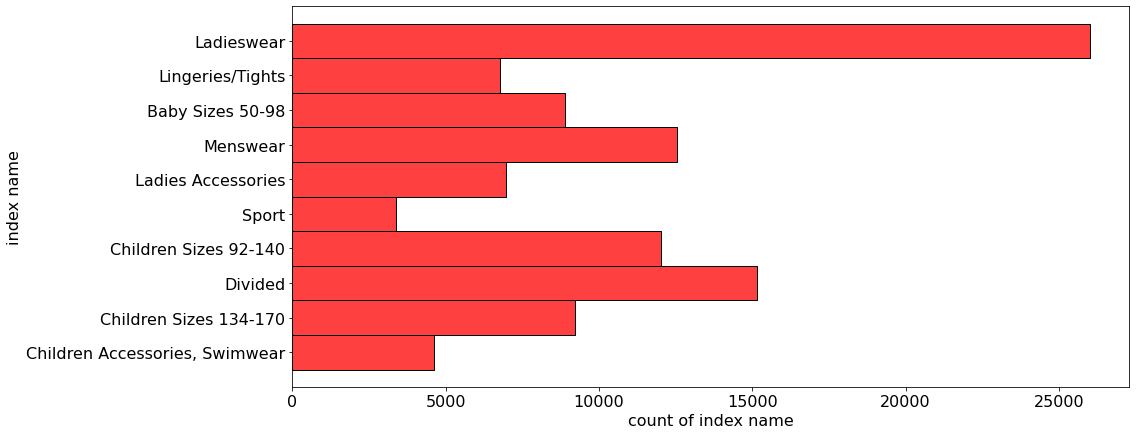

In [32]:
f, ax = plt.subplots(figsize = (15,7))

ax = sns.histplot(data=articles, y= "index_name", color = "red")
ax.set_xlabel('count of index name')
ax.set_ylabel('index name')
plt.show()

Ladies wear has the highest count for dresses and sports the least

Text(0, 0.5, 'garment group')

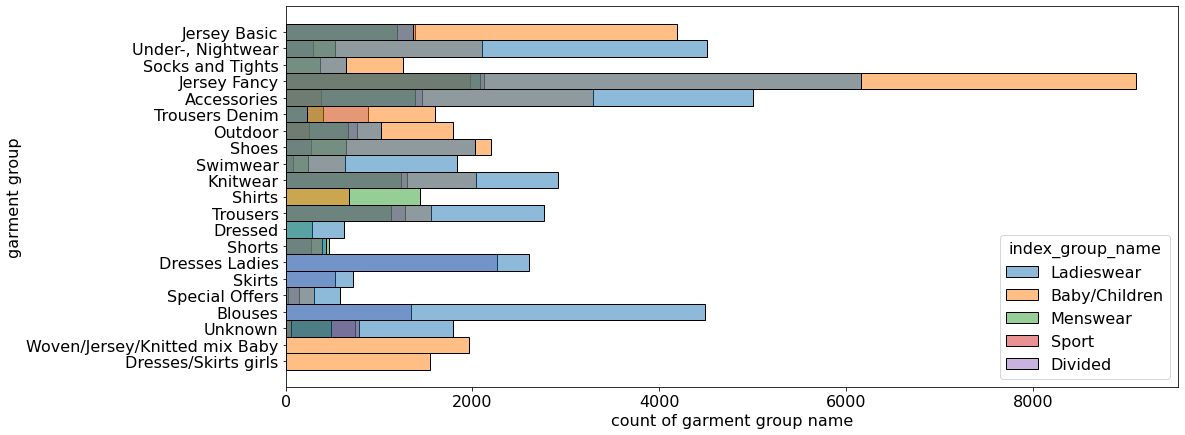

In [39]:
f, ax = plt.subplots(figsize = (16,7))
ax=sns.histplot(data = articles, y= "garment_group_name", hue='index_group_name', color ="orange")
ax.set_xlabel("count of garment group name")
ax.set_ylabel("garment group")

In [40]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']


index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [46]:
articles.groupby(["section_name"]).count()["article_id"]

section_name
Baby Boy                          1717
Baby Essentials & Complements     4932
Baby Girl                         1760
Boys Underwear & Basics           2034
Collaborations                     559
Contemporary Casual               1560
Contemporary Smart                1778
Contemporary Street               1490
Denim Men                          521
Divided Accessories               1732
Divided Asia keys                  280
Divided Basics                    1723
Divided Collection                7124
Divided Complements Other           35
Divided Projects                  2364
Divided Selected                   991
EQ Divided                          26
Girls Underwear & Basics          3490
H&M+                              2337
Kids & Baby Shoes                 2142
Kids Accessories, Swimwear & D    1731
Kids Boy                          3328
Kids Girl                         4469
Kids Local Relevance               192
Kids Outerwear                    2665
Kids Sports 

In [47]:
print(articles.nunique(axis=0))

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64


In [50]:
for col in articles.columns:
    if not "no" in col and not "code" in col and not"id" in col:
        un = articles[col].nunique()
        print(f'n of unique {col}: {un}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404


Customers
Customers data description:

customer_id : A unique identifier of every customer
FN : 1 or missed
Active : 1 or missed
club_member_status : Status in club
fashion_news_frequency : How often H&M may send news to customer
age : The current age
postal_code : Postal code of customer

In [51]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [52]:
customers.shape

(1371980, 7)

In [55]:
#check no of duplicate customers
customers.customer_id.nunique()

1371980

No duplicate customers

In [56]:
customers.groupby(["age", "fashion_news_frequency"]).count()["customer_id"]

age   fashion_news_frequency
16.0  NONE                         86
      Regularly                    75
17.0  NONE                       6380
      Regularly                  2987
18.0  NONE                      15823
                                ...  
97.0  Regularly                     1
98.0  NONE                          4
      Regularly                     2
99.0  NONE                          8
      Regularly                     5
Name: customer_id, Length: 222, dtype: int64

Most of them are active

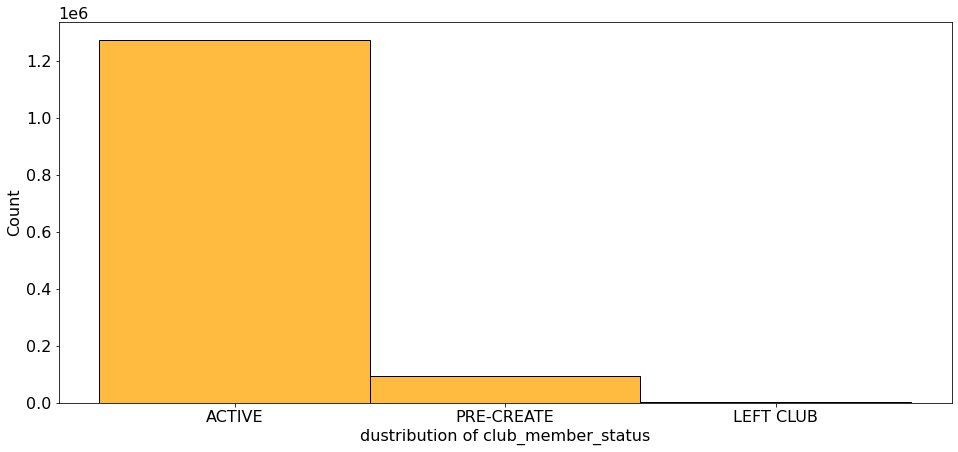

In [67]:
f, ax = plt.subplots(figsize = (16,7))
ax = sns.histplot(data = customers, x = 'club_member_status', bins=50, color ="orange")
ax.set_xlabel("dustribution of club_member_status")
plt.show()

most common age between 21-23

In [ ]:
f, ax = plt.subplots(figsize = (16,7))
ax = sns.histplot(data = customers, x = 'age', bins=50, color ="orange")
ax.set_xlabel("dustribution of age")
plt.show()

In [68]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

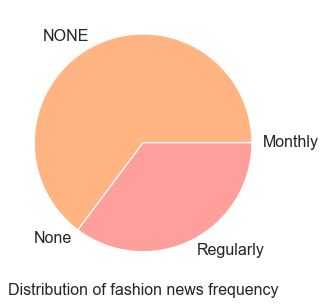

In [72]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

4. TRANSCATIONS

In [77]:
transcation.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


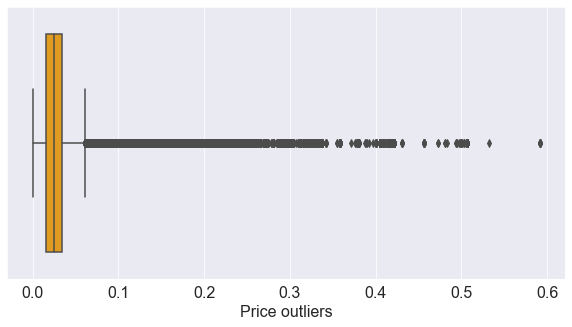

In [79]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transcation, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

In [83]:
transcation_byid = transcation.groupby('customer_id').count()
transcation_byid.sort_values(by='price', ascending=False)['price'][:10]


customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

In [85]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_for_merge = transcation[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

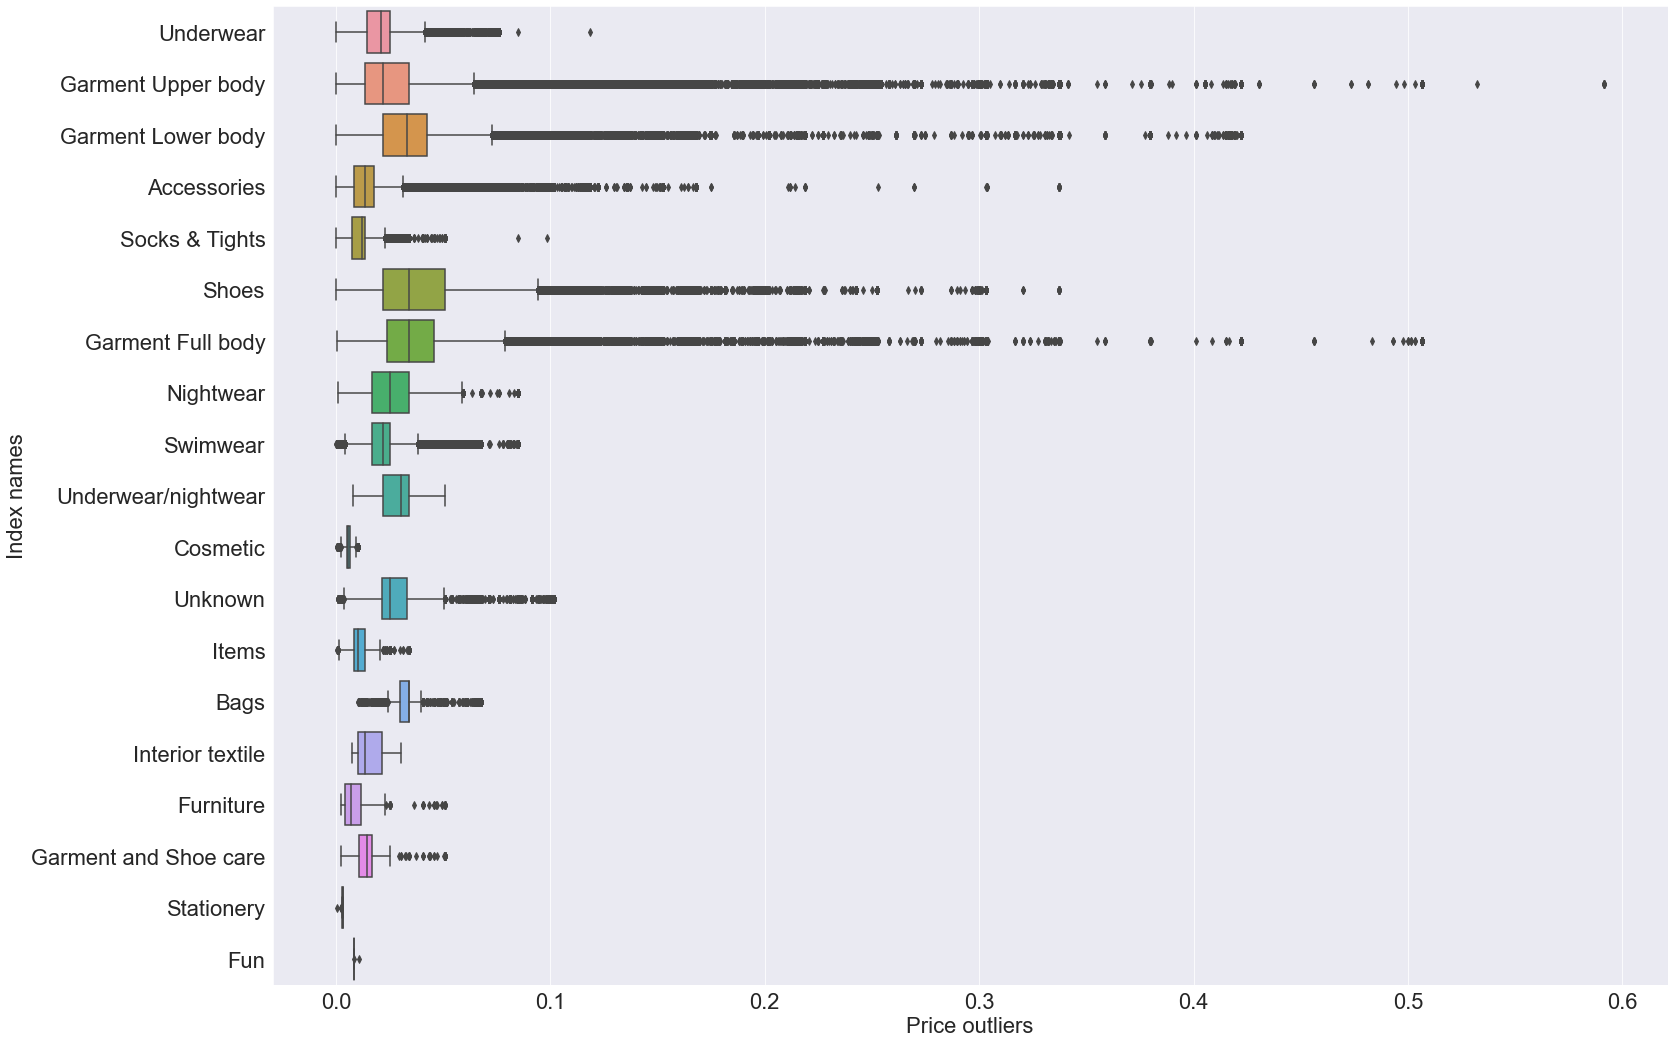

In [86]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

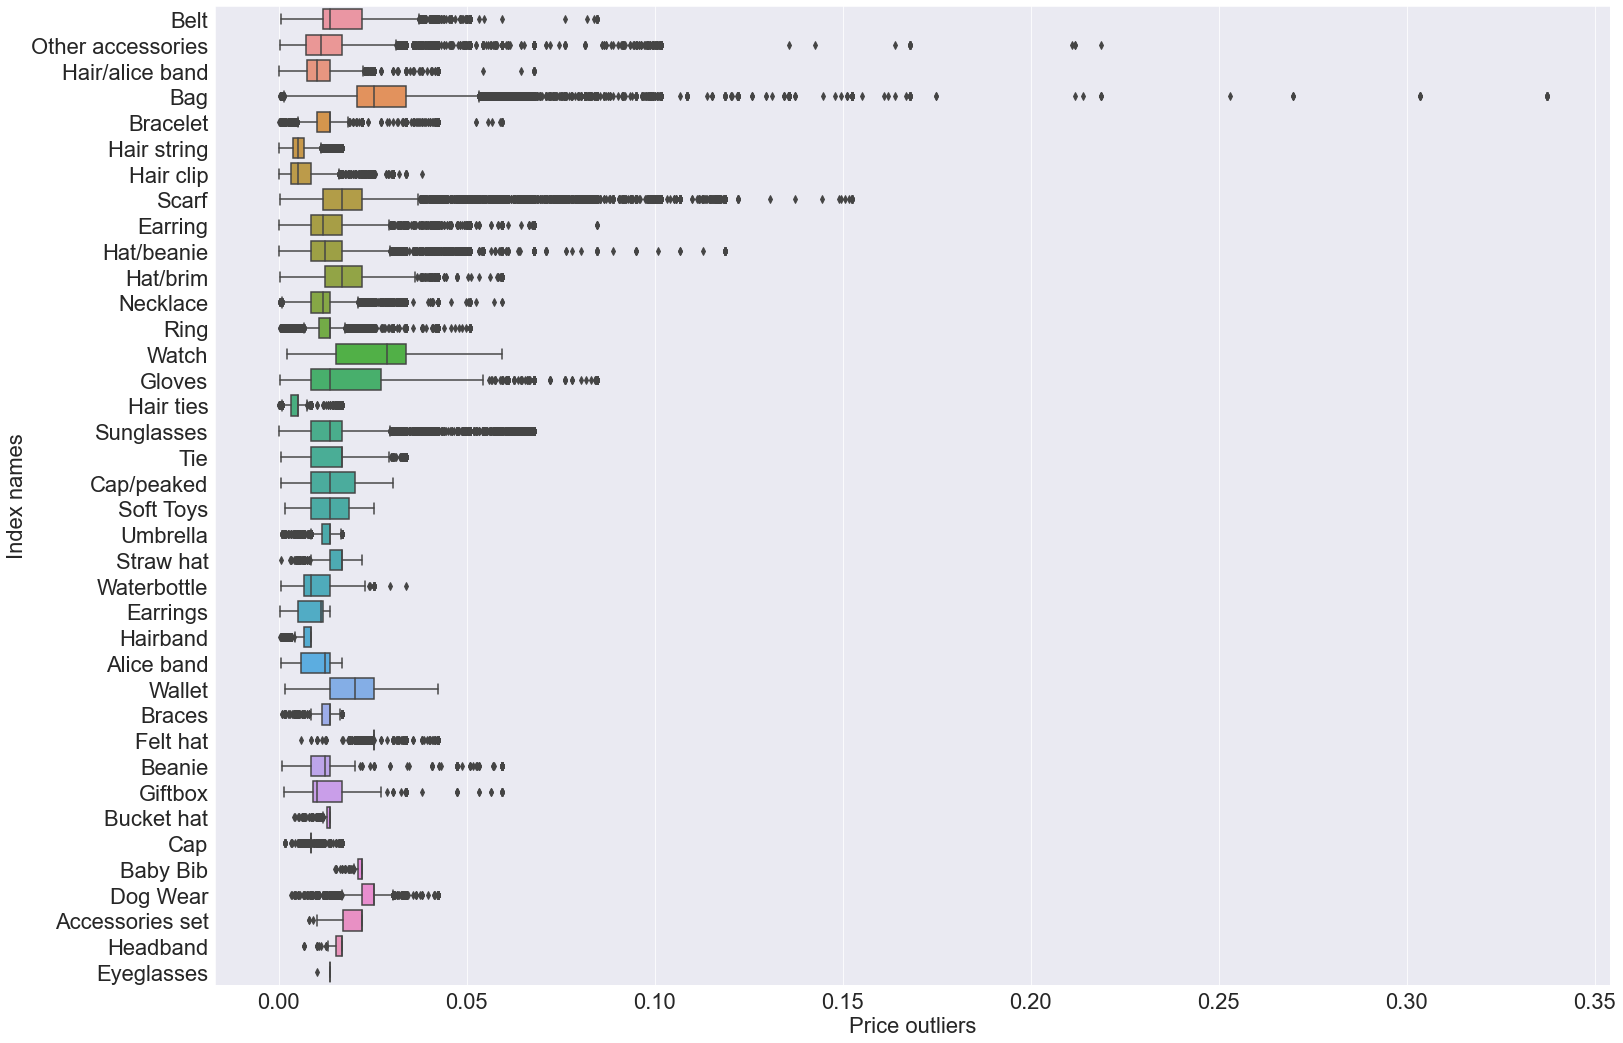

In [87]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

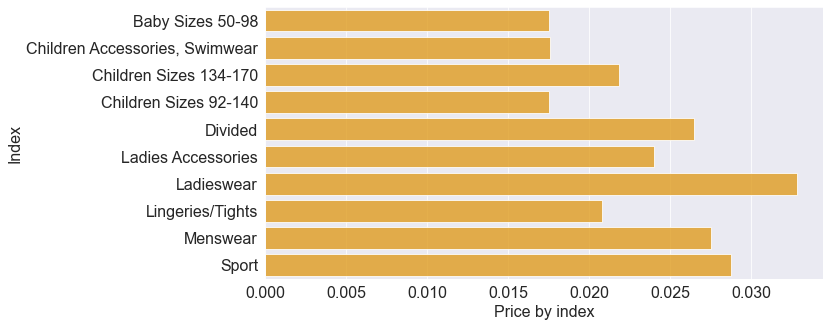

In [88]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

The index with the highest mean price is Ladieswear. With the lowest - children.

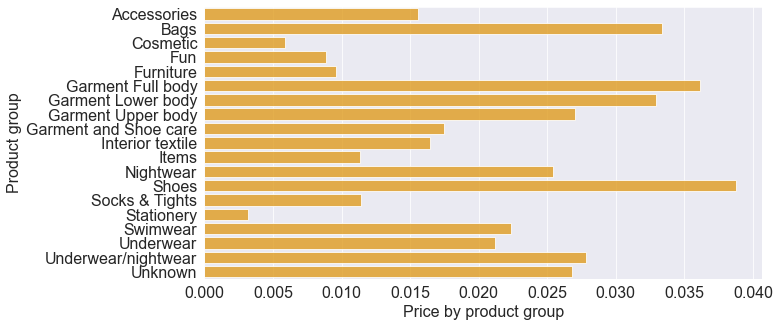

In [89]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

Stationery has the lowest mean price, the highest - shoes.